###  Практическоe заданиe 3

### Библиотеки

In [6]:
import numpy as np
from collections import Counter
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt
import operator

1. Написать функции для подсчета следующих выборочных числовых
характеристик: а) математическое ожидание, b) медиана, c) усеченное среднее
(доля усеченных данных – аргумент функции), d) дисперсия, e) квантиль
заданного порядка (уровень квантиля – аргумент функции), f) центральный и
начальный момент заданного порядка (порядок – аргумент функции).


    Для подсчета каждой характеристики необходима отдельная функция.


    При написании не использовать библиотечные функции вычисления числовых
характеристик.


In [7]:
def mean(x):
    statistic_range = list(Counter(x).items())
    n = len(x)
    res = 0.
    for item in statistic_range:
        res += item[0] * (item[1] / n)
    return res

def median(x):
    return quantile(x, 0.5)

def trim_mean(x, part):
    assert (0 < part < 1)
    variation_x = sorted(list(x))
    trimmed_x = variation_x[int(part * len(x)):int(len(x) - int(part * len(x)))]
    return mean(trimmed_x)

def var(x):
    return mean(x * x) - mean(x) ** 2

def quantile(x, level):
    assert (0 < level < 1)
    statistic_range = list(Counter(x).items())
    statistic_range.sort(key=lambda a: a[0])
    n = len(x)
    int_func = []
    prev = 0
    for item in statistic_range:
        int_func.append(prev + item[1] / n)
        prev += item[1] / n
    int_func.append(1)
    ind = 0
    if level in int_func:
        ind = int_func.index(level)
    elif level < int_func[0]:
        return statistic_range[0][0]
    else:
        for it in range(1, len(int_func) - 1):
            if int_func[it - 1] < level < int_func[it + 1]:
                ind = it
    return statistic_range[ind][0]

def central_moment(x, order):
    return mean((x - mean(x)) ** order)

def start_moment(x, order):
    return mean(x ** order)

Проверить правильность работы функций, сравнив их выходы с выходами
функций библиотек statistics/ numpy/ scipy на примере выборочных данных,
полученных по результатам наблюдений за величиной ξ – видимость дороги в
момент совершения аварии (Visibility).


In [8]:
PATH = 'E:/data-analytics/lab3/'
data = pd.read_excel(PATH + "02_Автоаварии.xls")

data.dropna(axis=0, subset=["Visibility(mi)"], inplace=True)

print("\nМатематическое ожидание")
print("numpy ", np.mean(data["Visibility(mi)"]))
print("my own", mean(data["Visibility(mi)"]))
print("\nДисперсия: ")
print("numpy ", np.var(data["Visibility(mi)"]))
print("my own", var(data["Visibility(mi)"]))
print("\nКвантиль порядка 0.1:")
print("numpy ", np.quantile(data["Visibility(mi)"], 0.1))
print("my own", quantile(data["Visibility(mi)"], 0.1))
print("\nМедиана:")
print("numpy ", np.median(data["Visibility(mi)"]))
print("my own", median(data["Visibility(mi)"]))
print("\nУсечённое среднее:")
print("scipy ", stats.trim_mean(data["Visibility(mi)"], 0.1))
print("my own", trim_mean(data["Visibility(mi)"], 0.1))
print("\nЦентральный момент:")
print("scipy ", stats.moment(data["Visibility(mi)"], 3))
print("my own", central_moment(data["Visibility(mi)"], 3))
print("\nНачальный момент:")
print("scipy  not found")
print("myown", start_moment(data["Visibility(mi)"], 1))


Математическое ожидание
numpy  9.46561113352158
my own 9.465611133521582

Дисперсия: 
numpy  3.5586499996501475
my own 3.558649999650129

Квантиль порядка 0.1:
numpy  8.0
my own 8.0

Медиана:
numpy  10.0
my own 10.0

Усечённое среднее:
scipy  9.94077620967742
my own 9.940776209677418

Центральный момент:
scipy  -5.138314621395408
my own -5.138314621395432

Начальный момент:
scipy  not found
myown 9.465611133521582


2. Построить график, отражающий зависимость среднего значения видимости
дороги от степени серьезности аварии. График будет представлять из себя
ломанную, построенную по 4 точкам вида (x, y), где x – степень серьезности
аварии, y – среднее значение видимости дороги.
Аналогичный график построить для выборочной медианы и усеченного
среднего. Сделать первичные выводы о взаимном влиянии двух указанных
величин и наличии выбросов в наблюдениях.


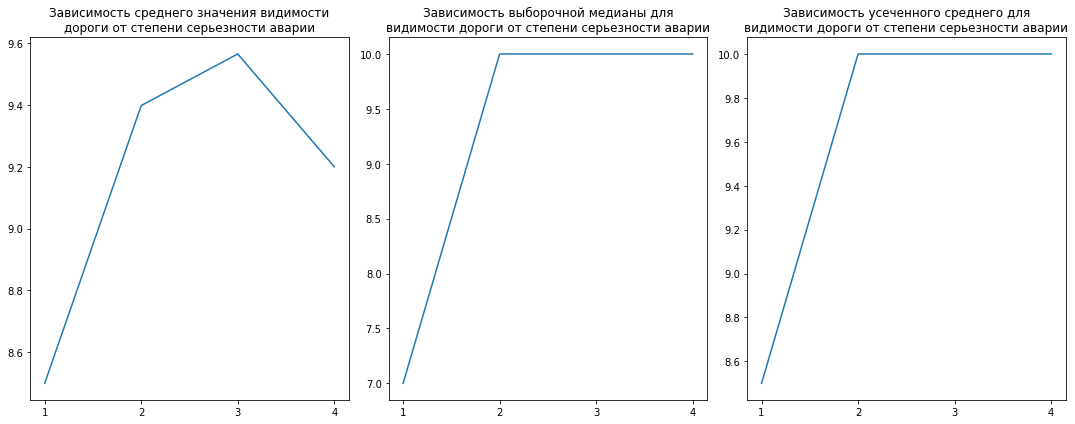

In [9]:
fig, axes = plt.subplots(ncols=3,figsize=(15,6))
mean_visibility = []
severity = []
median_visibility = []
trimmed_mean_visibility = []
for i in range(4):
    severity.append(i + 1)
    mean_visibility.append(mean(data.loc[data["Severity"] == i + 1]["Visibility(mi)"]))
    median_visibility.append(median(data.loc[data["Severity"] == i + 1]["Visibility(mi)"]))
    trimmed_mean_visibility.append(trim_mean(data.loc[data["Severity"] == i + 1]["Visibility(mi)"], 0.2))
axes[0].plot(severity, mean_visibility)
axes[0].set_xticks(severity)
axes[0].set_title("Зависимость среднего значения видимости\nдороги от степени серьезности аварии")
axes[1].plot(severity, median_visibility)
axes[1].set_xticks(severity)
axes[1].set_title("Зависимость выборочной медианы для\nвидимости дороги от степени серьезности аварии")
axes[2].plot(severity, trimmed_mean_visibility)
axes[2].set_xticks(severity)
axes[2].set_title("Зависимость усеченного среднего для\nвидимости дороги от степени серьезности аварии")
fig.tight_layout()
plt.show()


3. Построить оценки функций распределения величин ζ1,ζ2,ζ3,ζ4 – скорость
ветра в момент совершения аварии степени серьезности 1, 2, 3, 4 по квантилям
порядков {0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95}.
Также построить коробчатые диаграммы для указанных величин. Определить
моду (моды) распределений указанных величин.


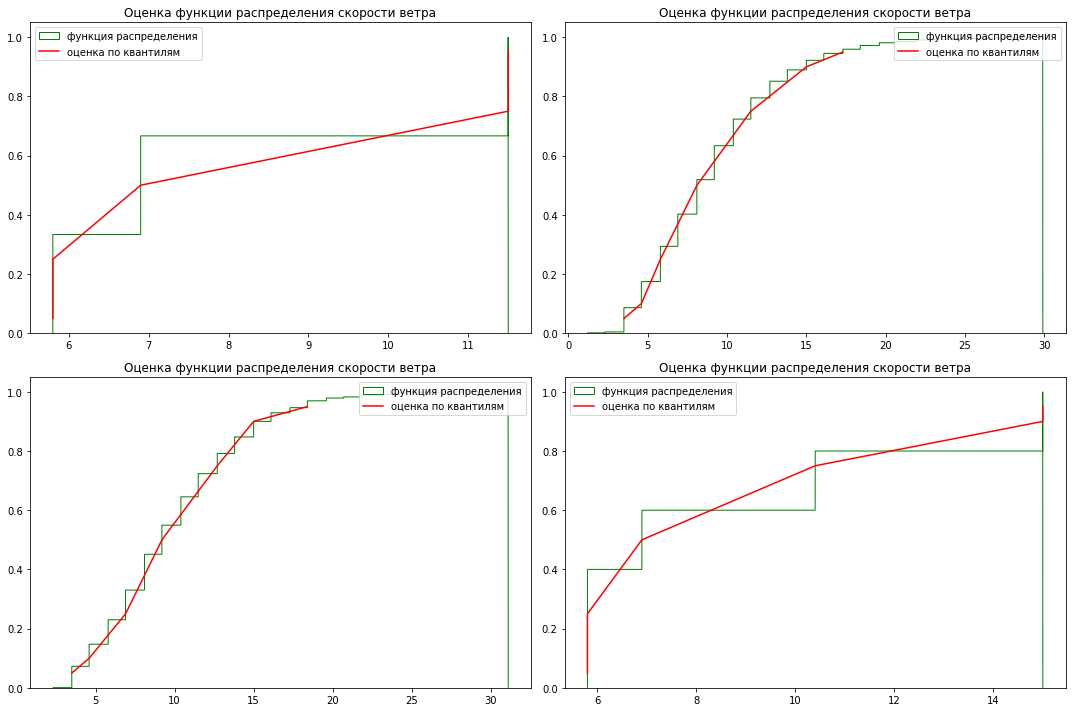

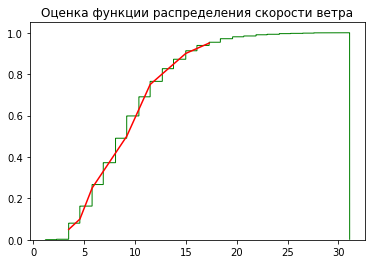

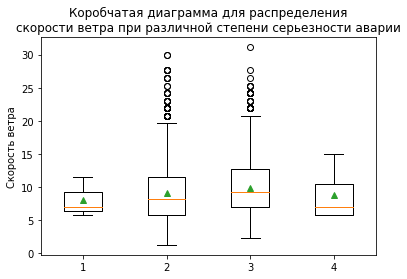

Выборочная мода для Wind_Speed(mph) :  8.1
Выборочная мода для Wind_Speed(mph) [Severity] == 1:  5.8
Выборочная мода для Wind_Speed(mph) [Severity] == 2:  5.8
Выборочная мода для Wind_Speed(mph) [Severity] == 3:  8.1
Выборочная мода для Wind_Speed(mph) [Severity] == 4:  5.8


In [10]:
data.dropna(axis=0, subset=["Wind_Speed(mph)"], inplace=True)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
quantiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

for i in range(4):
    axes[int(i / 2)][i % 2].hist(data.loc[data["Severity"] == i + 1]["Wind_Speed(mph)"], bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True, label="функция распределения")
    q_values = []
    for q in quantiles:
        q_values.append(quantile(data.loc[data["Severity"] == i + 1]["Wind_Speed(mph)"], q))
    axes[int(i / 2)][i % 2].plot(q_values, quantiles, color='red', label="оценка по квантилям")
    axes[int(i / 2)][i % 2].set_title("Оценка функции распределения скорости ветра")
    axes[int(i / 2)][i % 2].legend()
fig.tight_layout()
plt.show()

plt.hist(data["Wind_Speed(mph)"],
bins=data.shape[0], color='green', cumulative=True, histtype='step', density=True)
q_values = []
for q in quantiles:
 q_values.append(quantile(data["Wind_Speed(mph)"], q))
plt.plot(q_values, quantiles, color='red')
plt.title("Оценка функции распределения скорости ветра")
plt.show()

plt.boxplot([data.loc[data["Severity"] == 1]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 2]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 3]["Wind_Speed(mph)"],
data.loc[data["Severity"] == 4]["Wind_Speed(mph)"]], showmeans=True)
plt.xticks(np.arange(1, 5, step=1), labels=["1", "2", "3", "4"])
plt.ylabel("Скорость ветра")
plt.title("Коробчатая диаграмма для распределения\nскорости ветра при различной степени серьезности аварии")
plt.show()

print("Выборочная мода для Wind_Speed(mph) : ",
max(Counter(data["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 1: ",
max(Counter(data.loc[data["Severity"] == 1]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 2: ",
max(Counter(data.loc[data["Severity"] == 2]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 3: ",
max(Counter(data.loc[data["Severity"] == 3]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])

print("Выборочная мода для Wind_Speed(mph) [Severity] == 4: ",
max(Counter(data.loc[data["Severity"] == 4]["Wind_Speed(mph)"]).items(), key=operator.itemgetter(1))[0])